In [1]:
import pandas as pd
import numpy as np

In [2]:
glass = pd.read_csv("glass.csv")

In [3]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [11]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(glass,test_size = 0.2) # 0.2 => 20 percent of entire data 

In [12]:
# KNN using sklearn 

# Importing Knn algorithm from sklearn.neighbors

from sklearn.neighbors import KNeighborsClassifier as KNC

In [13]:
# for 3 nearest neighbours 

neigh = KNC(n_neighbors= 3)

In [52]:
# Fitting with training data 

neigh.fit(train.iloc[:,1:8],train.iloc[:,9])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=49, p=2,
                     weights='uniform')

In [53]:
# train accuracy 
train_acc = np.mean(neigh.predict(train.iloc[:,1:8])==train.iloc[:,9])

In [54]:
# test accuracy
test_acc = np.mean(neigh.predict(test.iloc[:,1:8])==test.iloc[:,9])

In [55]:
# for 5 nearest neighbours

neigh = KNC(n_neighbors=5)

In [56]:
# fitting with training data

neigh.fit(train.iloc[:,1:8],train.iloc[:,9])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [57]:
# train accuracy 

train_acc = np.mean(neigh.predict(train.iloc[:,1:8])==train.iloc[:,9])

In [58]:
# test accuracy
test_acc = np.mean(neigh.predict(test.iloc[:,1:8])==test.iloc[:,9])

In [59]:
# creating empty list variable 
acc = []

In [60]:
for i in range(3,50,2):
    neigh = KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,1:8],train.iloc[:,9])
    train_acc = np.mean(neigh.predict(train.iloc[:,1:8])==train.iloc[:,9])
    test_acc = np.mean(neigh.predict(test.iloc[:,1:8])==test.iloc[:,9])
    acc.append([train_acc,test_acc])

In [61]:
import matplotlib.pyplot as plt # library to do visualizations 

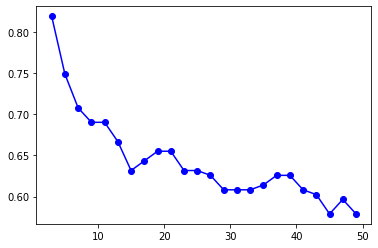

In [62]:
# train accuracy plot 

plt.plot(np.arange(3,50,2),[i[0] for i in acc],"bo-")

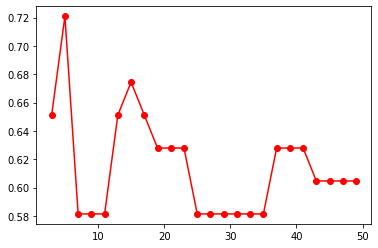

In [63]:
# test accuracy plot

plt.plot(np.arange(3,50,2),[i[1] for i in acc],"ro-")